In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [2]:
#load the dataset
heartdisease_df=pd.read_csv("heart.csv")
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]
# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)
# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [3]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

1.Üç farklı linkage yöntemini kullanarak kalp hastalığı veri kümesi için dendrogramlar üretin: “mean”, “complete” ve “ward”. Sizce hangi bağlantı yöntemi daha iyi sonuç vermektedir?  


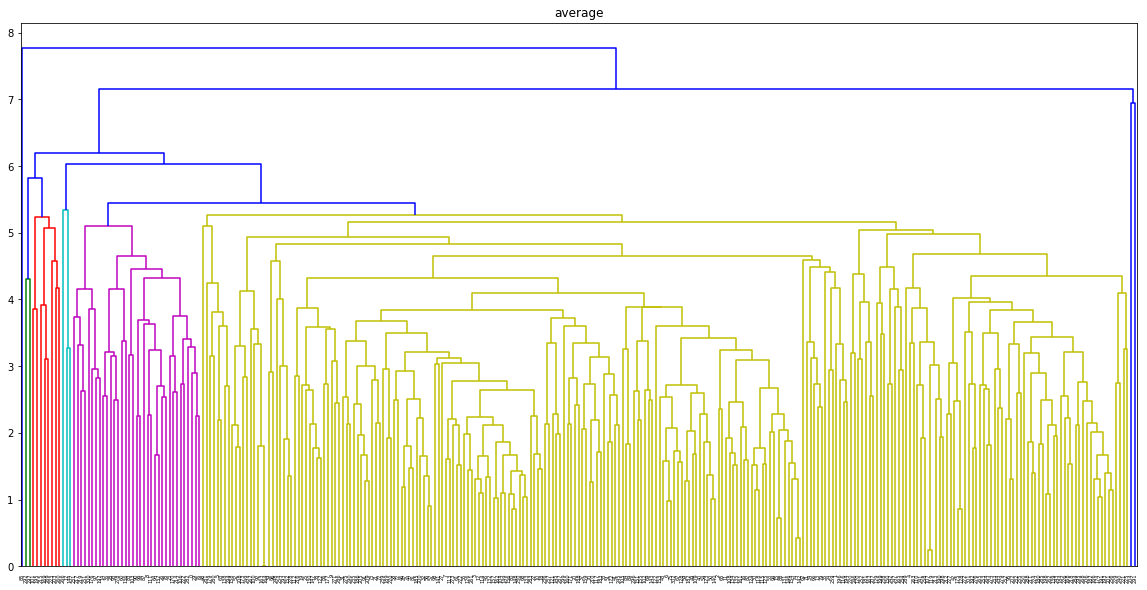

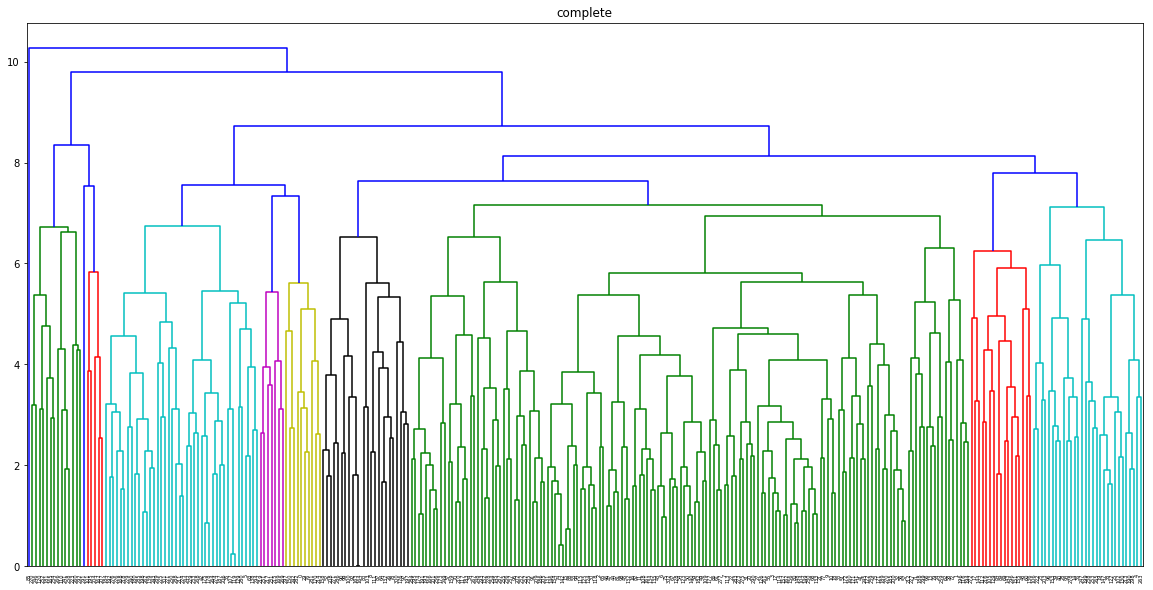

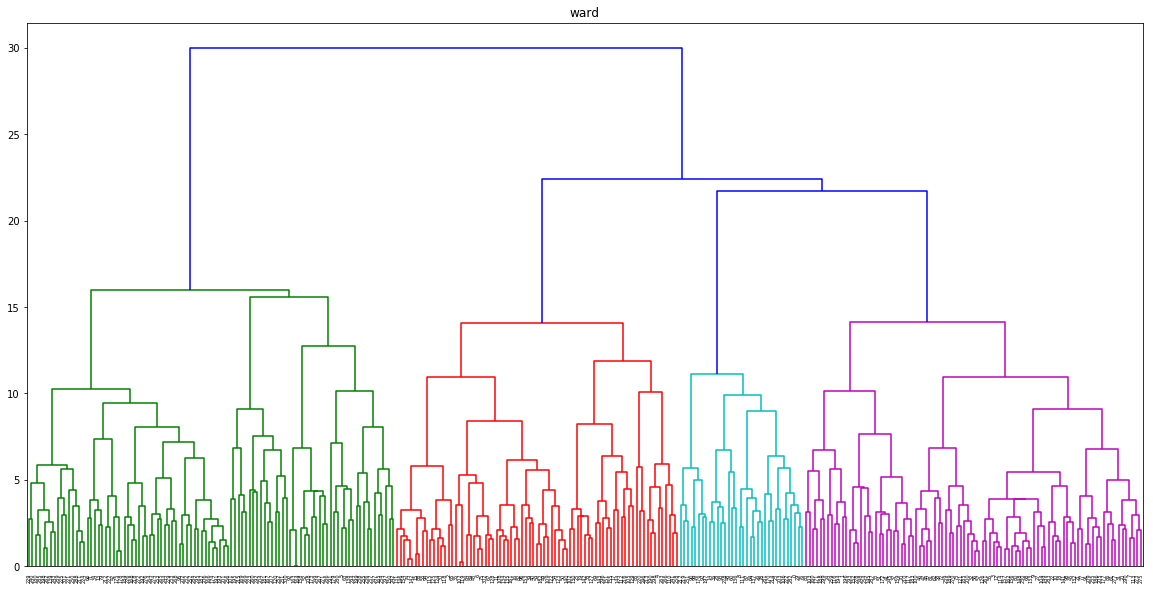

In [4]:
method=['average','complete','ward']

for i in method:
    
    plt.figure(figsize=(20,10))
    plt.title(i)
    dendrogram(linkage(X_std, method=i))
    plt.show()



2.n_clusters = 2 ayarını yaparak kalp hastalığı verilerine yığınsal kümeleme uygulayın. Yukarıdaki üç bağlantı yöntemini deneyin ve her bir çözümünüz için ARI ve siluet skorları elde edin. Sonuçları birbirleriyle ve önceki bölümde uyguladığınız k-ortalama çözümü ile karşılaştırın. Hangi algoritma ve ayar daha iyi performans gösterir?

In [5]:

for i in method:
    agg_küme = AgglomerativeClustering(linkage=i,affinity='euclidean',n_clusters=2)
    kümeler = agg_küme.fit_predict(X_std)   # Modeli Fit Etmek                                        
                                      
    print(i," icin Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}"
      .format(metrics.adjusted_rand_score(y, kümeler)))
    print(i," icin The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, kümeler, metric='euclidean')))



average  icin Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0010800413233203012
average  icin The silhoutte score of the Agglomerative Clustering solution: 0.3532620013624347
complete  icin Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0010800413233203012
complete  icin The silhoutte score of the Agglomerative Clustering solution: 0.3532620013624347
ward  icin Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.2454680392170414
ward  icin The silhoutte score of the Agglomerative Clustering solution: 0.1325316617259095


üç ayrı bağlantı için sonuçlar yukarda görülüyor. Bir önceki bölüm ödevinde k-ortalama çözüm ile 2 küme için elde edilen değerler de şöyle:  
n= 2 icin siluet degeri= 0.16759734983094837
n= 2 icin ayarlanmıs rand indeksi= 0.3951165387976022  
Ayarlanmıs rand indeksi  k ortalama için en fazla çıktı. Siluet sayısı ise "euclidian" metriği kullanılarak average ve complete bağlantıları için aynı ve en yüksek çıktı.